## Paramètres propres à mon PC, à changer chez vous

In [25]:
%cd /home/raphael/MILA/ift6759/Solar-Irradiance-Prediction
# Il faut utiliser CD pour s'assurer de rouler dans la racine i.e. '/home/raphael/MILA/ift6759/Solar-Irradiance-Prediction'
%pwd 

/home/raphael/MILA/ift6759/Solar-Irradiance-Prediction


'/home/raphael/MILA/ift6759/Solar-Irradiance-Prediction'

Code générique pour n'importe qui

In [28]:

#%cd   #change to the dir you want 
from src.data import dataloader as dl
from src.data import metadata as meta
from src.data import config
from src.data import image
import logging

bnd_coordinates  = meta.Coordinates(40.05192, -88.37309, 230)
logging.basicConfig(level=logging.ERROR)

In [29]:
#Configuration pour rouler en local, à modifier de votre côté!
la_config = {}
la_config["LOCAL_PATH"] = "/home/raphael/MILA/ift6759/project1_data/hdf5v7_8bit/"
la_config["SKIP_MISSING"] = True
la_config["FEATURES"] = ["image", "target_ghi", "metadata"]
meta_config = config.read_configuration_file("tests/data/samples/train_config_raphael.json") #Il faut ajuster les path ici!


In [30]:
#Instanciation des objets requis
metadataloader = meta.MetadataLoader(dataframe=meta_config.catalog)

In [31]:
loaded_meta= metadata.load(meta.Station.BND,bnd_coordinates, target_datetimes=meta_config.target_datetimes, night_time=False, skip_missing=True)
dataset = dl.create_dataset(metaloader, la_config)

# Le caching, super efficace, en une ligne


In [32]:
dataset = dataset.cache(filename="basic_loader")

Poutine pour mesurer le temps d'éxecution

In [41]:
delta = np.zeros((len(metadata.catalog)+1,4))
import time
start_time = time.time()
import cProfile

Poutine pour afficher les images dans le notebook

In [42]:
%matplotlib inline
from IPython.display import clear_output

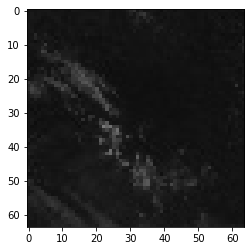

--- 8.041808843612671 secondes (4894.79428888249 images par secondes)---


In [44]:
#Boucle principale. La première itération sera lente (20 IPS), mais après on va à 5000 IPS sur une machine décente.
#(L'affichage réduit pas mal le nombre d'IPS)
i=0
start_time = time.time()
for (sample, target, augmented_features) in dataset:
    delta[i] = augmented_features[0:4].numpy() - target.numpy()
    i=i+1
    if(i%2000)==0: #On affiche une image sur 1000
        clear_output(wait=True)
        plt.imshow(sample.numpy().squeeze(), cmap='gray', vmin = 0, vmax = 255)
        plt.show()
        
images_ok = i
temps = time.time() - start_time
print("--- %s secondes (%s images par secondes)---" % (temps, images_ok/temps))
